In [24]:
import numpy as np
import pandas as pd
import scipy.fftpack
import scipy.signal as signal
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [26]:
def interpolate_data(cgm_series_row_data,cgm_dt_row_data):
    #print(cgm_series_row_data)
    cgm_series_data_transpose = []
    cgm_dt_data_transpose = []
    glu =[]
    datetime = []
    
    for element in cgm_series_row_data:
        cgm_series_data_transpose.append(element)
    
    for element in cgm_dt_row_data:
        cgm_dt_data_transpose.append(element)   

    data = {'dt': cgm_dt_data_transpose, 'glucose':cgm_series_data_transpose}  
    df = pd.DataFrame(data)
    df['dt'].interpolate(inplace=True)
    datetime  = df['dt'].values.tolist()
    df.set_index('dt', inplace=True)
    df['newZVal'] = df['glucose'].interpolate(method = 'polynomial', order = 2)
    glu = df['newZVal'].values.tolist()
    return glu, datetime

In [27]:
def clean_data():
    max_limit = 0.7 # Allowing 30% NaN data to interpolate, delete the row if >= 70%
    drop_row = []
    
    # Interpolate NaN if row has less NaN records than max_limit for cgm_series
    for i in range(len(df_series_lunch_pat1)):
        no_of_nan_glucose = df_series_lunch_pat1.iloc[i].isnull().sum()
        if no_of_nan_glucose > 0:
            percent_of_data = (no_of_nan_glucose/len(df_series_lunch_pat1.iloc[i]))
            if percent_of_data < max_limit:
                df_series_lunch_pat1.loc[i],df_date_num_lunch_pat1.loc[i] = interpolate_data(df_series_lunch_pat1.iloc[i],df_date_num_lunch_pat1.iloc[i])

In [28]:
def calFFT():
    x = []
    for i in range(0,len(df_date_num_lunch_pat1.iloc[0])):
        x.append(i*5)
    
    for elem in range(len(df_series_lunch_pat1)):
        cgm_fft_values  = abs(scipy.fftpack.fft(df_series_lunch_pat1.iloc[elem].values))[::-1]
        cgm_dt_values = df_date_num_lunch_pat1.iloc[elem].values
        val = set(cgm_fft_values)
        val = sorted(val, reverse = True)
        print (cgm_fft_values)
        #print (val)
        FirstHighPeak = list(val)[1]
        secondHighPeak = list(val)[2]
        print (FirstHighPeak,secondHighPeak)
        plt.plot(x,cgm_fft_values)#,use_line_collection = True
        plt.show()

In [29]:
#take maximum amplitude
def calWelch():
    for elem in range(len(df_series_lunch_pat1)):
        v, cgm_fft_values  = np.array((signal.welch(df_series_lunch_pat1.iloc[elem].values)))
        print (cgm_fft_values)
        print (v)
        print (max(np.sqrt(cgm_fft_values)))
        print (np.where(cgm_fft_values == max(cgm_fft_values)))
        plt.plot(v,np.sqrt(cgm_fft_values))#,use_line_collection = True
        plt.show()

In [30]:
def calCgmVelocity():
    time_interval = 10 # taking time interval as 10 mins    
    for elem in range(len(df_series_lunch_pat1)):
        print ('**********************************************')
        print ('Counter - ',elem)
        window_size = 2
        velocity = []
        row_data = df_series_lunch_pat1.iloc[elem].values[::-1]
        row_length = len(row_data)
        print (row_data)
        counter = 0
        x_cgmvel = []
        while window_size < len(row_data):            
            x_cgmvel.append(counter)
            counter += 5
            print ('__________________________________________________')
            print ('Window Size - ',window_size)
            disp = abs(row_data[window_size] - row_data[window_size - 2])
            print('Disp -',disp)
            vel = round((disp/time_interval),2)
            print ('Velocity - ',vel)
            velocity.append(vel)
            #To calculate when window_size exceeds array size
            if window_size != row_length and (window_size+2) >= row_length:
                disp = (row_data[row_length - 1] - row_data[window_size])
                vel = round((disp/(((row_length - 1) - window_size)*5)),2)
                velocity.append(vel)
            window_size += 2
        velocity.pop()
        print (velocity)
        print (x_cgmvel)
        plt.plot(x_cgmvel,velocity)#,use_line_collection = True
        plt.show()

In [31]:
clean_data()

In [32]:
#check for rows having na in Series data:
nan_rows = pd.isnull(df_series_lunch_pat1).any(1).to_numpy().nonzero()[0].tolist()
print (nan_rows)

[10, 16, 17, 23]


In [33]:
# Drop these rows from Series and Date Time df
df_series_lunch_pat1 = df_series_lunch_pat1.drop(nan_rows)
df_date_num_lunch_pat1 = df_date_num_lunch_pat1.drop(nan_rows)

In [34]:
df_date_num_lunch_pat1.shape

(34, 31)

In [35]:
df_series_lunch_pat1.shape

(34, 31)

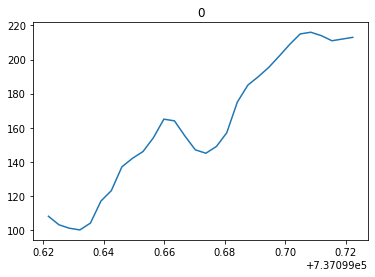

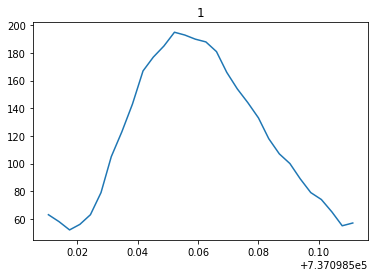

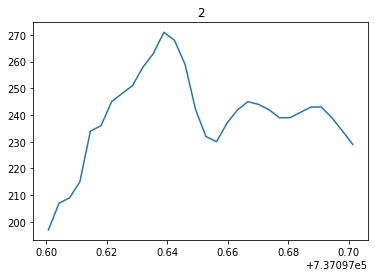

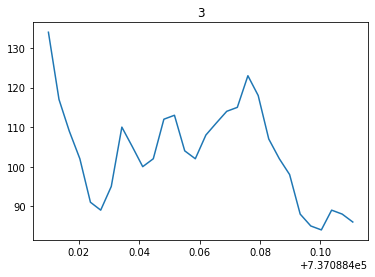

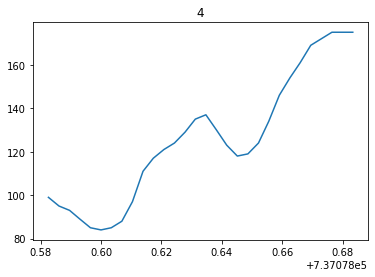

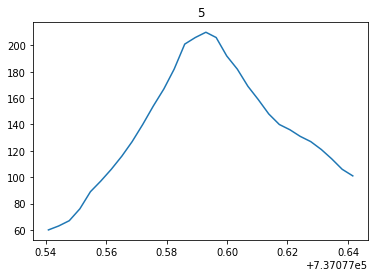

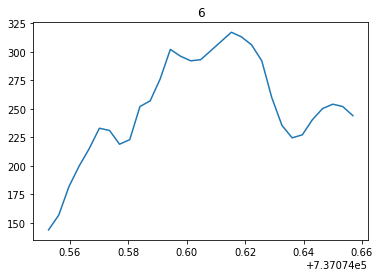

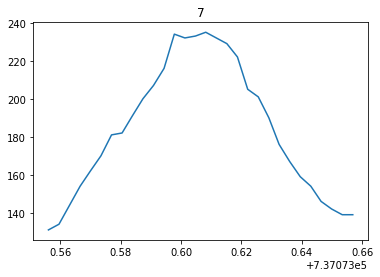

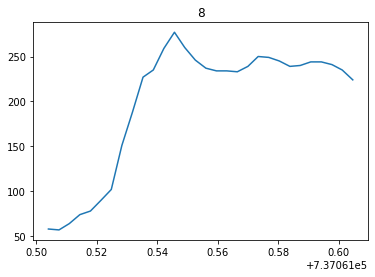

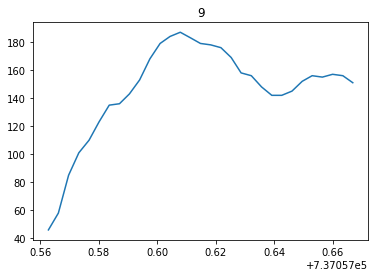

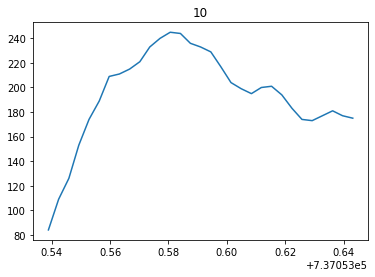

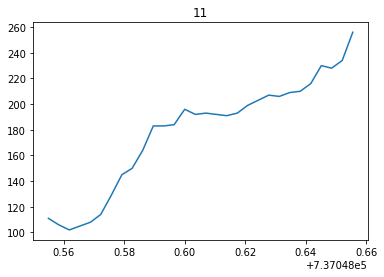

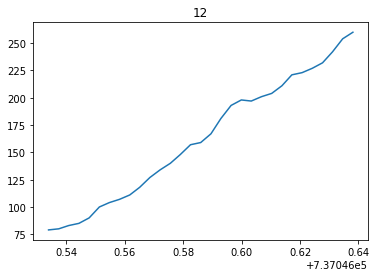

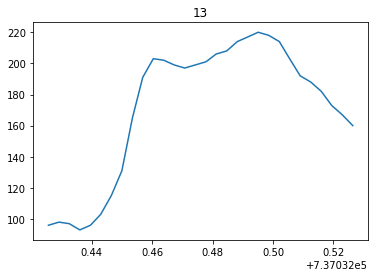

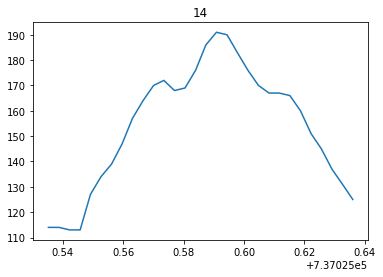

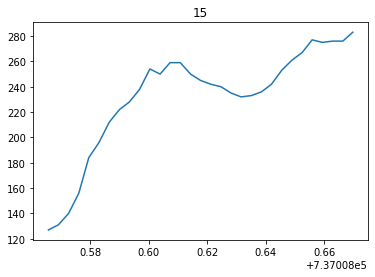

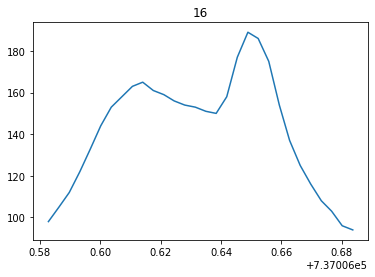

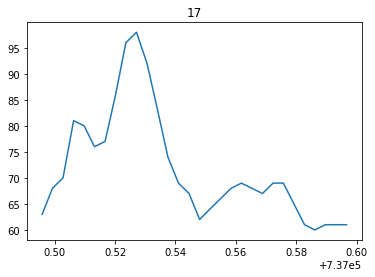

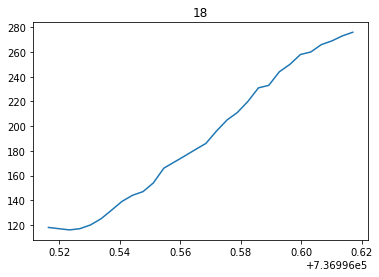

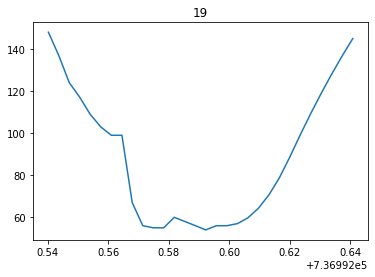

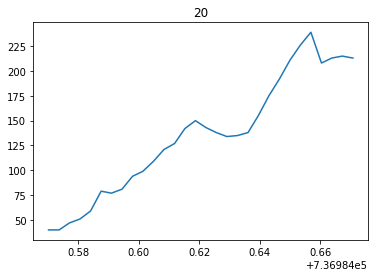

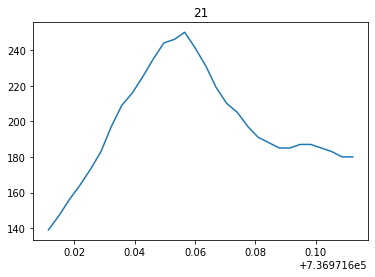

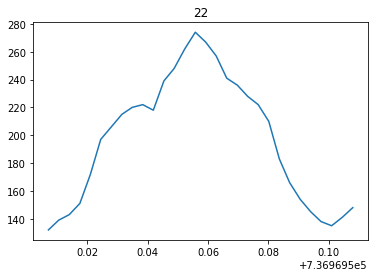

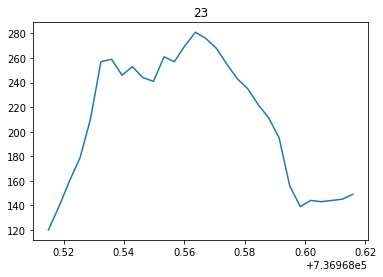

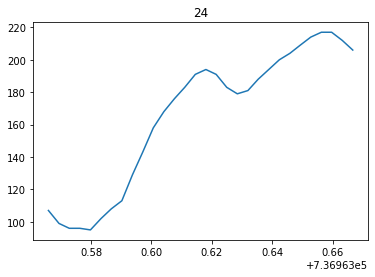

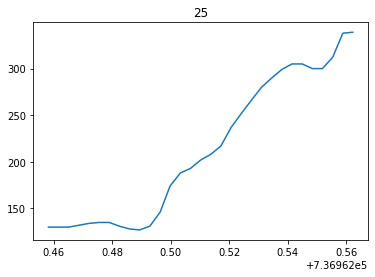

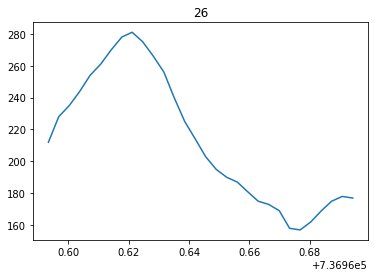

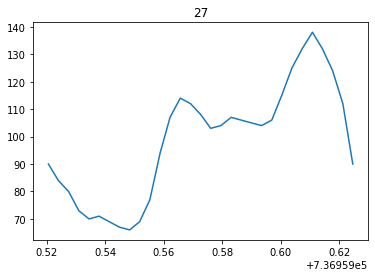

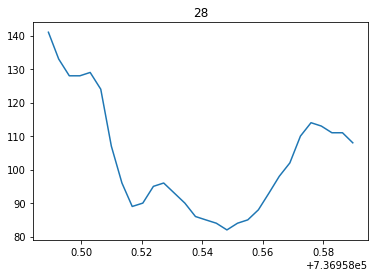

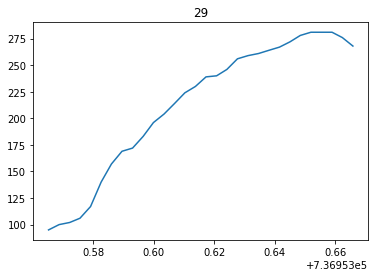

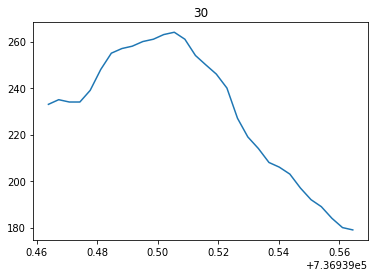

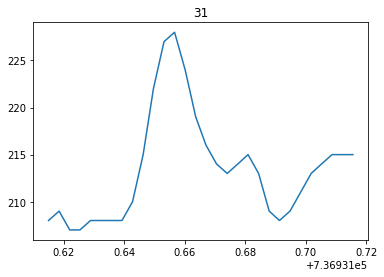

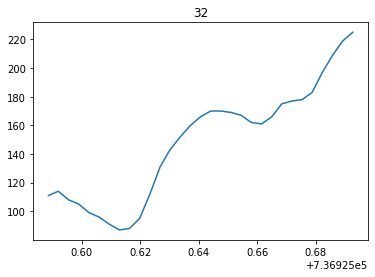

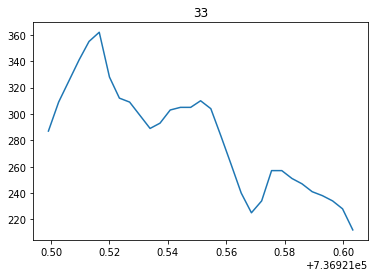

In [36]:
for i in range(len(df_series_lunch_pat1)):
    plt.plot(df_date_num_lunch_pat1.iloc[i],df_series_lunch_pat1.iloc[i])
    plt.title(str(i))
    plt.show()

[ 665.81412931  460.09278264  130.23149887  153.60668264   50.4356768
  102.50070124   90.58550995   60.30201935   81.8669877    57.40496991
   51.30962746   60.04217984   57.24785346   62.23360815   46.94037767
   46.94037767   62.23360815   57.24785346   60.04217984   51.30962746
   57.40496991   81.8669877    60.30201935   90.58550995  102.50070124
   50.4356768   153.60668264  130.23149887  460.09278264  665.81412931
 4962.45657962]
665.814129305446 460.0927826421936


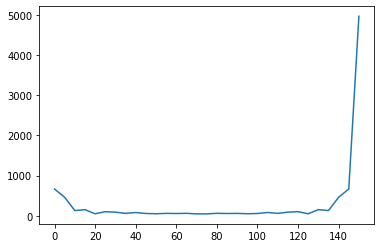

[1.08147652e+03 2.05028204e+02 7.16339943e+01 5.57562246e+01
 2.81719651e+01 2.57475568e+01 5.21444853e+00 1.36264988e+01
 2.88292154e+01 1.11867983e+01 1.70442944e+01 7.22520496e+00
 2.38367013e+00 3.19788348e+00 2.72518354e+00 2.72518354e+00
 3.19788348e+00 2.38367013e+00 7.22520496e+00 1.70442944e+01
 1.11867983e+01 2.88292154e+01 1.36264988e+01 5.21444853e+00
 2.57475568e+01 2.81719651e+01 5.57562246e+01 7.16339943e+01
 2.05028204e+02 1.08147652e+03 3.62200000e+03]
1081.4765217387776 205.02820372358227


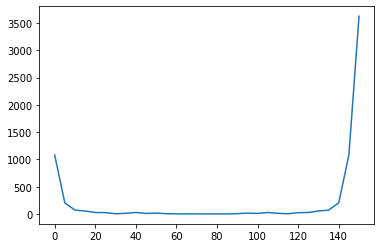

[2.56582506e+02 2.53433545e+02 2.44334800e+01 1.29244252e+02
 1.96782554e+01 3.40979302e+01 1.53146531e+01 2.91006883e+01
 2.79452128e+01 2.86524734e+01 2.58670651e+01 1.69830554e+01
 1.22483636e+00 1.61129338e+01 1.75481570e+01 1.75481570e+01
 1.61129338e+01 1.22483636e+00 1.69830554e+01 2.58670651e+01
 2.86524734e+01 2.79452128e+01 2.91006883e+01 1.53146531e+01
 3.40979302e+01 1.96782554e+01 1.29244252e+02 2.44334800e+01
 2.53433545e+02 2.56582506e+02 7.37900000e+03]
256.582506185763 253.43354486122993


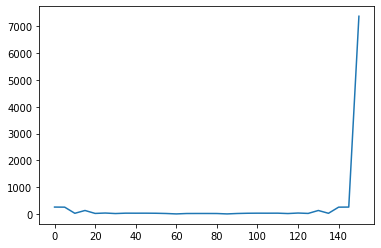

[  72.02652449  155.2500772   168.88146815   65.37956976   82.68295107
   33.54710058   33.84141882   83.90054643   37.21962758   25.99663668
   31.22801881   35.13060676   16.26326828   17.16362609   21.66044222
   21.66044222   17.16362609   16.26326828   35.13060676   31.22801881
   25.99663668   37.21962758   83.90054643   33.84141882   33.54710058
   82.68295107   65.37956976  168.88146815  155.2500772    72.02652449
 3235.        ]
168.8814681494517 155.2500771966055


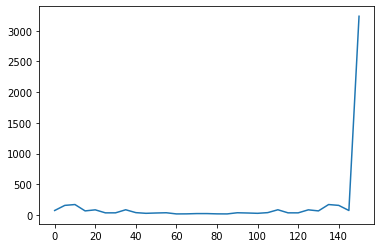

[ 472.15359933  374.09766842  109.90216843   58.95161697  110.89494205
   47.50066566   59.92784543   52.34352703   48.84493743   40.37562753
   43.52066781   36.83102409   40.13418127   41.9709504    41.02481211
   41.02481211   41.9709504    40.13418127   36.83102409   43.52066781
   40.37562753   48.84493743   52.34352703   59.92784543   47.50066566
  110.89494205   58.95161697  109.90216843  374.09766842  472.15359933
 3863.        ]
472.1535993291545 374.09766841959043


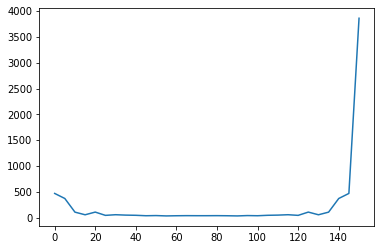

[ 956.29713181  173.04225905  155.86916387   46.81096408   40.37942718
   24.956611     25.2585775    28.54051185   20.557599     31.83822299
   21.74402427   24.04382458   13.10021081   23.72952687   19.72108431
   19.72108431   23.72952687   13.10021081   24.04382458   21.74402427
   31.83822299   20.557599     28.54051185   25.2585775    24.956611
   40.37942718   46.81096408  155.86916387  173.04225905  956.29713181
 4153.        ]
956.2971318087203 173.0422590537078


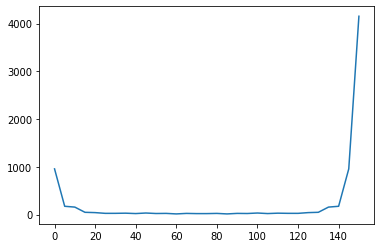

[ 837.43764235  104.51553853  227.74889403  342.54211823  122.14007935
   62.97900782   77.35738101   79.91866969  101.93971529   73.11283947
   48.61822581   59.14720577   44.83398911   46.87377485   52.47376406
   52.47376406   46.87377485   44.83398911   59.14720577   48.61822581
   73.11283947  101.93971529   79.91866969   77.35738101   62.97900782
  122.14007935  342.54211823  227.74889403  104.51553853  837.43764235
 7797.89933936]
837.4376423459037 342.5421182325265


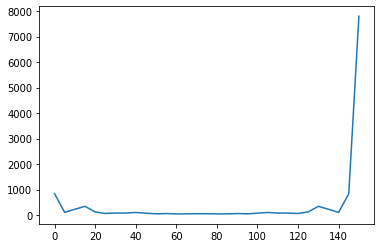

[7.67062191e+02 4.80493413e+01 4.86600011e+01 3.65646577e+01
 1.42955452e+01 1.25255994e+01 2.07604988e+01 1.90562465e+01
 6.36070666e+00 1.77887388e+01 2.45245963e+01 6.89318419e+00
 7.04160971e+00 5.08609909e+00 1.61978913e+01 1.61978913e+01
 5.08609909e+00 7.04160971e+00 6.89318419e+00 2.45245963e+01
 1.77887388e+01 6.36070666e+00 1.90562465e+01 2.07604988e+01
 1.25255994e+01 1.42955452e+01 3.65646577e+01 4.86600011e+01
 4.80493413e+01 7.67062191e+02 5.63800000e+03]
767.0621909754916 48.66000105673233


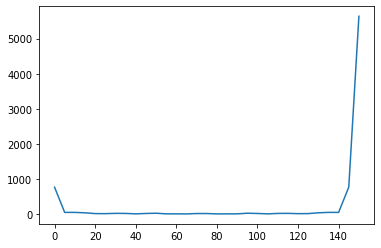

[1323.75705559  838.8494563   144.95085857  269.29839124  194.57930507
  163.28736317   97.28544345  121.31962967  112.37539279   80.19391133
  102.02824611   62.9845922    96.91221995  102.22900916   64.38812531
   64.38812531  102.22900916   96.91221995   62.9845922   102.02824611
   80.19391133  112.37539279  121.31962967   97.28544345  163.28736317
  194.57930507  269.29839124  144.95085857  838.8494563  1323.75705559
 6012.        ]
1323.7570555859118 838.8494562951257


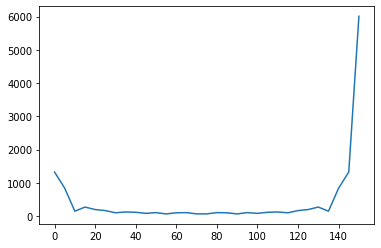

[ 551.875989    323.84666723  211.25505134  184.28487328  125.62884508
   91.28535049  106.68482423   98.14987608   77.00911692   68.70645527
   49.77051972   47.77643062   59.97488418   49.49302636   49.44417449
   49.44417449   49.49302636   59.97488418   47.77643062   49.77051972
   68.70645527   77.00911692   98.14987608  106.68482423   91.28535049
  125.62884508  184.28487328  211.25505134  323.84666723  551.875989
 4511.        ]
551.875989002888 323.84666723254156


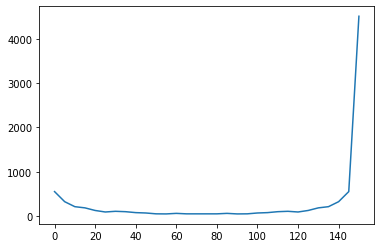

[ 688.0663431   293.68906332  151.12969265  192.63950905  150.29176351
   62.99876643   76.99420508   64.56538874   64.20710038   39.01301459
   57.26498298   55.27032938   60.52587029   65.01341575   51.07094581
   51.07094581   65.01341575   60.52587029   55.27032938   57.26498298
   39.01301459   64.20710038   64.56538874   76.99420508   62.99876643
  150.29176351  192.63950905  151.12969265  293.68906332  688.0663431
 6001.        ]
688.0663431017579 293.6890633162887


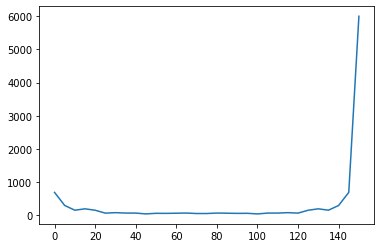

[ 720.15882098  484.00574116  209.5769555   180.5611477   138.23507652
  102.17311826  111.27156128   99.51166801   74.66444321  120.68702112
   94.15695757   95.36374145   84.79478735   77.00501132   77.71635698
   77.71635698   77.00501132   84.79478735   95.36374145   94.15695757
  120.68702112   74.66444321   99.51166801  111.27156128  102.17311826
  138.23507652  180.5611477   209.5769555   484.00574116  720.15882098
 5450.        ]
720.1588209814081 484.00574115621055


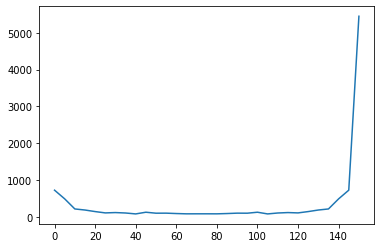

[1000.07738227  429.4415231   331.60558912  237.79571513  198.735824
  181.37188363  130.39763645  142.18588457  111.16877101  116.69879743
  105.41255432   94.15270964   86.30190261   93.70555045   92.73989794
   92.73989794   93.70555045   86.30190261   94.15270964  105.41255432
  116.69879743  111.16877101  142.18588457  130.39763645  181.37188363
  198.735824    237.79571513  331.60558912  429.4415231  1000.07738227
 5033.        ]
1000.0773822706652 429.4415231028704


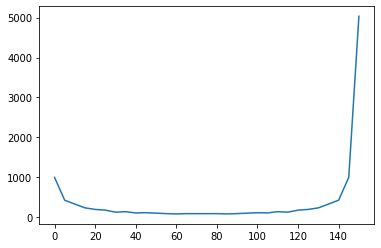

[ 913.50323918  320.38775187  119.92281621   88.39169912  111.38048003
   30.6980987    41.75676029   56.51721824   48.76612334   35.75983562
   33.77286859   33.34605299   24.93237746   28.34872579   33.62139679
   33.62139679   28.34872579   24.93237746   33.34605299   33.77286859
   35.75983562   48.76612334   56.51721824   41.75676029   30.6980987
  111.38048003   88.39169912  119.92281621  320.38775187  913.50323918
 5244.        ]
913.503239180707 320.3877518698957


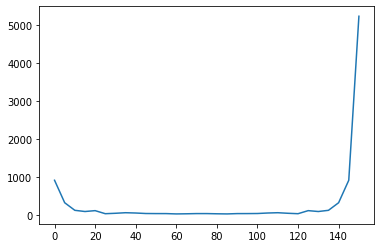

[5.23310437e+02 7.78832403e+01 5.88137944e+01 4.91625653e+01
 4.44937334e+01 1.70402265e+01 1.63114231e+01 1.23240468e+01
 1.49264242e+01 1.46603615e+01 3.56790154e+00 2.31872968e+00
 3.75916506e+00 8.46517183e+00 6.38279450e+00 6.38279450e+00
 8.46517183e+00 3.75916506e+00 2.31872968e+00 3.56790154e+00
 1.46603615e+01 1.49264242e+01 1.23240468e+01 1.63114231e+01
 1.70402265e+01 4.44937334e+01 4.91625653e+01 5.88137944e+01
 7.78832403e+01 5.23310437e+02 4.73600000e+03]
523.3104366237246 77.8832402500586


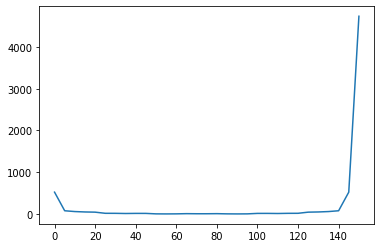

[ 482.00116359  601.87834344  291.42864184  222.11908756  179.88100836
  132.9209876   113.26686822  107.98147974  104.45649796   84.16171355
  102.36851284   88.28163081   79.87726068   93.33144336   75.94602219
   75.94602219   93.33144336   79.87726068   88.28163081  102.36851284
   84.16171355  104.45649796  107.98147974  113.26686822  132.9209876
  179.88100836  222.11908756  291.42864184  601.87834344  482.00116359
 7179.        ]
601.8783434427179 482.0011635855771


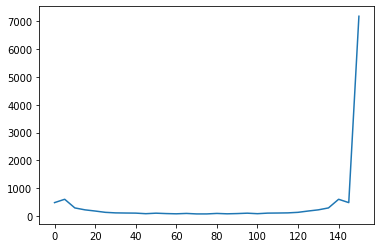

[5.16625432e+02 2.89084066e+02 1.17945920e+02 7.18156075e+01
 5.09857429e+01 3.00299665e+01 9.84465254e+00 6.46369932e+00
 5.41373938e+00 1.20827590e+01 6.49580543e+00 5.76173537e+00
 6.85445846e+00 4.74265731e+00 3.41058837e+00 3.41058837e+00
 4.74265731e+00 6.85445846e+00 5.76173537e+00 6.49580543e+00
 1.20827590e+01 5.41373938e+00 6.46369932e+00 9.84465254e+00
 3.00299665e+01 5.09857429e+01 7.18156075e+01 1.17945920e+02
 2.89084066e+02 5.16625432e+02 4.35300000e+03]
516.6254317495126 289.0840655516378


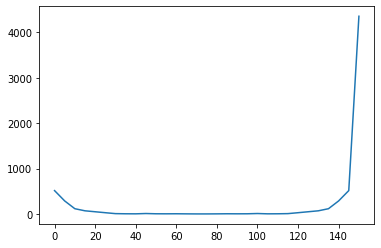

[ 174.09398905  113.32420152   57.5527808    42.37888658   38.08121209
   33.4901399    16.69048487   11.62099369    6.49277868    5.76826871
    3.82616823    8.38927962    4.5324388     8.29081414    7.17624413
    7.17624413    8.29081414    4.5324388     8.38927962    3.82616823
    5.76826871    6.49277868   11.62099369   16.69048487   33.4901399
   38.08121209   42.37888658   57.5527808   113.32420152  174.09398905
 2214.        ]
174.09398905455546 113.32420152079762


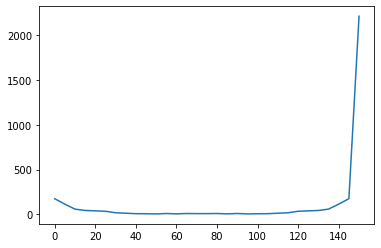

[1019.87923629  451.57365325  262.00653614  203.24475645  145.9918664
  146.53159449  127.96602268  104.97377309   96.93725499   99.99240274
   88.15827258   85.52010057   84.86486277   86.55501058   72.31941924
   72.31941924   86.55501058   84.86486277   85.52010057   88.15827258
   99.99240274   96.93725499  104.97377309  127.96602268  146.53159449
  145.9918664   203.24475645  262.00653614  451.57365325 1019.87923629
 5819.        ]
1019.8792362923525 451.5736532504162


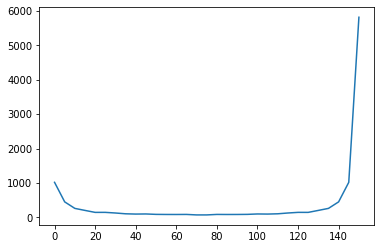

[ 699.71844911  133.09274729   30.46693881   64.57312667   58.61854621
   28.58855807   21.35284493   17.2889502    21.8385719    21.5329015
   14.93776965   11.57763609   16.43252189   15.57560288    8.07596783
    8.07596783   15.57560288   16.43252189   11.57763609   14.93776965
   21.5329015    21.8385719    17.2889502    21.35284493   28.58855807
   58.61854621   64.57312667   30.46693881  133.09274729  699.71844911
 2814.38412278]
699.7184491124557 133.09274728731756


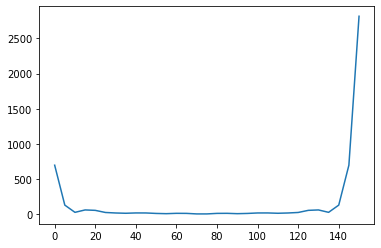

[1013.98435635  681.11835553  312.37225204  184.31875598  162.99165044
  147.98119868  150.30041245  163.71622635  129.42647109   82.2311686
   65.2266522    83.15430061   81.40012214  102.38094536  101.56566798
  101.56566798  102.38094536   81.40012214   83.15430061   65.2266522
   82.2311686   129.42647109  163.71622635  150.30041245  147.98119868
  162.99165044  184.31875598  312.37225204  681.11835553 1013.98435635
 4091.        ]
1013.9843563545811 681.1183555328331


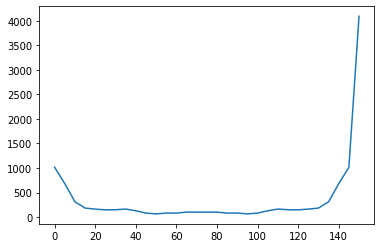

[ 588.08928776  266.48316528   79.03465052   72.62395319   25.43601437
   49.53221392   38.32629411   32.01603667   23.94908532   25.37992101
   21.5114636    24.6999225    15.42698799   24.07035669   20.04327517
   20.04327517   24.07035669   15.42698799   24.6999225    21.5114636
   25.37992101   23.94908532   32.01603667   38.32629411   49.53221392
   25.43601437   72.62395319   79.03465052  266.48316528  588.08928776
 6077.        ]
588.0892877556818 266.483165275338


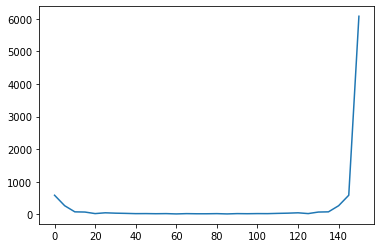

[ 993.10460211   73.80482943   79.22994012  143.24184068   37.18242966
   18.44095963   25.75652878   31.68437049   36.94125037   21.73979471
    9.78613411   22.30343648   14.15377318   22.15513379    7.61067072
    7.61067072   22.15513379   14.15377318   22.30343648    9.78613411
   21.73979471   36.94125037   31.68437049   25.75652878   18.44095963
   37.18242966  143.24184068   79.22994012   73.80482943  993.10460211
 6041.        ]
993.1046021097761 143.24184068473184


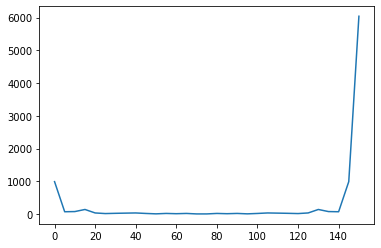

[1113.74934645  174.78250693  214.68417657  198.29994525   41.70701175
   45.67988075   24.92457777   58.22448004   76.582999     25.67206438
   44.36982685   36.38324966   18.41537887   21.79696053   10.4969959
   10.4969959    21.79696053   18.41537887   36.38324966   44.36982685
   25.67206438   76.582999     58.22448004   24.92457777   45.67988075
   41.70701175  198.29994525  214.68417657  174.78250693 1113.74934645
 6422.        ]
1113.749346451164 214.68417657101264


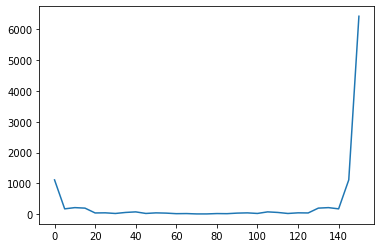

[ 789.21845493  447.05280601  149.95775043  111.37930485  120.82763542
   52.29376576   75.06862018   63.38154989   56.07769143   49.26374109
   52.56166821   57.52455655   54.02872395   48.92186921   51.0978377
   51.0978377    48.92186921   54.02872395   57.52455655   52.56166821
   49.26374109   56.07769143   63.38154989   75.06862018   52.29376576
  120.82763542  111.37930485  149.95775043  447.05280601  789.21845493
 5060.        ]
789.2184549323946 447.05280600555824


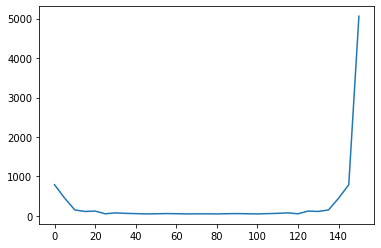

[1460.41605177  416.90069325  253.12102249  353.90279012  216.00510583
  226.91358296  188.13667561  148.10701166  149.3356223   115.86182728
  121.81154816  105.45501695  104.44510855  100.8446626    95.60294799
   95.60294799  100.8446626   104.44510855  105.45501695  121.81154816
  115.86182728  149.3356223   148.10701166  188.13667561  226.91358296
  216.00510583  353.90279012  253.12102249  416.90069325 1460.41605177
 6594.        ]
1460.4160517740008 416.90069325477805


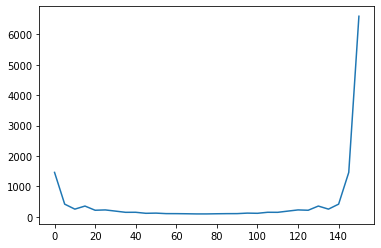

[8.59655363e+02 1.19933946e+02 7.81116816e+01 2.37062076e+01
 2.72466205e+01 2.40538913e+01 2.99302359e+01 2.51814302e+01
 4.17992436e+00 1.89847859e+01 2.43131874e+01 2.26833347e+01
 2.36490918e+01 2.25913778e+01 2.55927174e+01 2.55927174e+01
 2.25913778e+01 2.36490918e+01 2.26833347e+01 2.43131874e+01
 1.89847859e+01 4.17992436e+00 2.51814302e+01 2.99302359e+01
 2.40538913e+01 2.72466205e+01 2.37062076e+01 7.81116816e+01
 1.19933946e+02 8.59655363e+02 6.60000000e+03]
859.6553625935547 119.9339456566929


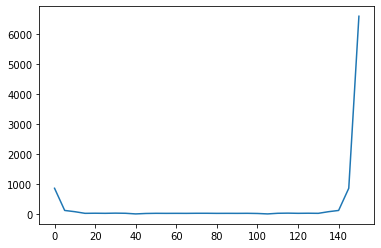

[ 380.0530916   217.74750031  105.254111     71.42417169   49.99466332
   23.88960472   12.76238047   10.98055074   11.6135788     3.79155621
   12.90806981   14.67751886    9.82688803   12.95410999    6.20704701
    6.20704701   12.95410999    9.82688803   14.67751886   12.90806981
    3.79155621   11.6135788    10.98055074   12.76238047   23.88960472
   49.99466332   71.42417169  105.254111    217.74750031  380.0530916
 3054.        ]
380.05309160377396 217.74750030759643


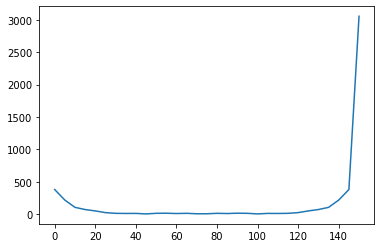

[ 353.56013818   69.79660708   98.94335076   14.16113656   60.94021898
   63.75830577   32.64288381   22.26268359   16.88991995   20.09068273
   25.74081438   18.8966834    14.57522165   12.59750981   20.21404609
   20.21404609   12.59750981   14.57522165   18.8966834    25.74081438
   20.09068273   16.88991995   22.26268359   32.64288381   63.75830577
   60.94021898   14.16113656   98.94335076   69.79660708  353.56013818
 3234.        ]
353.5601381768667 98.94335076153706


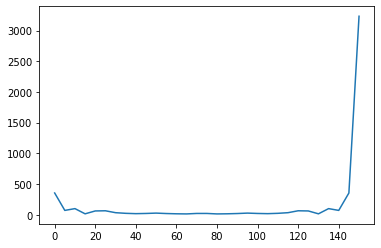

[1174.80704826  563.11432854  351.70823576  223.55056761  138.99878891
  147.80511243  155.01080706  122.26968802  107.6660698    94.58422666
   94.05844894   85.85822467   90.33051646   87.02503878   79.69395722
   79.69395722   87.02503878   90.33051646   85.85822467   94.05844894
   94.58422666  107.6660698   122.26968802  155.01080706  147.80511243
  138.99878891  223.55056761  351.70823576  563.11432854 1174.80704826
 6473.        ]
1174.8070482619914 563.1143285412511


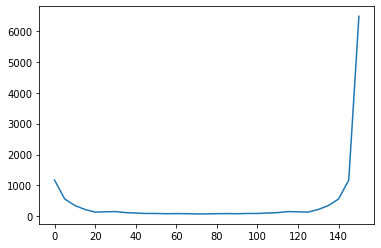

[ 559.01653583   77.76162566   82.18384472   88.90265012   72.55587795
   53.34447806   42.70850384   30.30459432   41.39144938   28.09292917
   26.81802288   31.62027679   26.74472782   28.65081493   28.59616296
   28.59616296   28.65081493   26.74472782   31.62027679   26.81802288
   28.09292917   41.39144938   30.30459432   42.70850384   53.34447806
   72.55587795   88.90265012   82.18384472   77.76162566  559.01653583
 7123.        ]
559.0165358344199 88.90265012050139


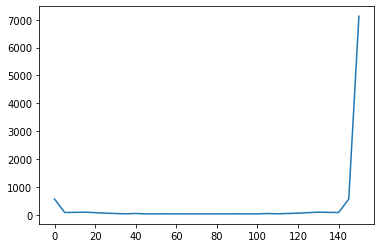

[7.34319386e+01 8.34374781e+01 1.85247478e+01 4.70829137e+01
 1.43648336e+01 2.71338317e+00 1.21818174e+01 5.62848690e+00
 6.24022482e+00 6.76861318e+00 4.89622029e+00 3.26750077e+00
 4.05408961e+00 2.82118300e+00 2.89558253e+00 2.89558253e+00
 2.82118300e+00 4.05408961e+00 3.26750077e+00 4.89622029e+00
 6.76861318e+00 6.24022482e+00 5.62848690e+00 1.21818174e+01
 2.71338317e+00 1.43648336e+01 4.70829137e+01 1.85247478e+01
 8.34374781e+01 7.34319386e+01 6.61000000e+03]
83.4374780647014 73.43193855416133


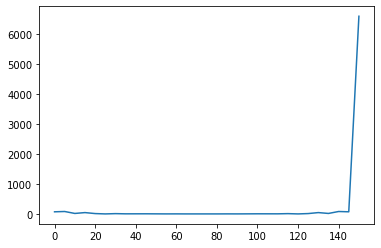

[ 694.70152319  409.35136891  137.80648433  161.64450885  154.75325804
   98.95539014   84.45954495   73.02775902   73.35364047   71.66632813
   65.26182022   61.14207125   64.26908397   64.1204932    60.04363108
   60.04363108   64.1204932    64.26908397   61.14207125   65.26182022
   71.66632813   73.35364047   73.02775902   84.45954495   98.95539014
  154.75325804  161.64450885  137.80648433  409.35136891  694.70152319
 4586.        ]
694.7015231936065 409.3513689063208


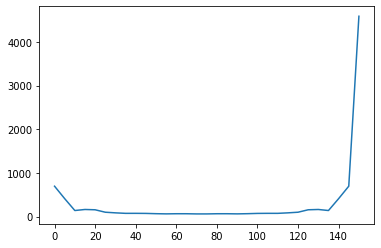

[ 707.50596627  261.69178821  397.80366038   75.92336613   50.2705565
   77.19699115   88.18130979   77.74133425   68.77838428   41.2436121
   33.35323975   43.8308622    49.6040485    43.8835655    27.22185662
   27.22185662   43.8835655    49.6040485    43.8308622    33.35323975
   41.2436121    68.77838428   77.74133425   88.18130979   77.19699115
   50.2705565    75.92336613  397.80366038  261.69178821  707.50596627
 8745.        ]
707.5059662731305 397.80366038208007


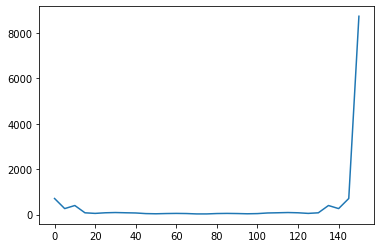

In [37]:
calFFT()

[1.28989255e+02 8.20354622e+03 5.26071624e+02 2.21867847e+03
 3.50652551e+02 3.26372427e+02 6.92735896e+01 1.22631223e+01
 3.14413151e+01 2.43902252e+01 3.54662725e+00 3.23027650e+00
 3.19216590e+00 9.69778526e-01 7.16984435e+00 2.61233979e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
90.57342999928241
(array([1], dtype=int64),)


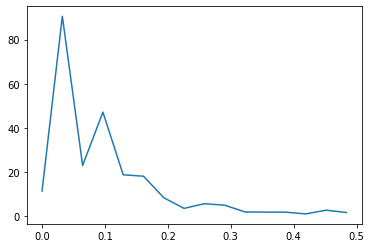

[2.48426018e+04 5.75473813e+04 1.99923901e+04 3.88309423e+02
 4.14633662e+01 1.00515341e+01 3.58632387e+00 8.06714477e+00
 1.33384615e+01 4.45381472e+01 2.65284249e+01 1.73245939e+01
 3.47752104e+00 1.25064264e+00 8.60786695e-01 1.17300777e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
239.89035262592856
(array([1], dtype=int64),)


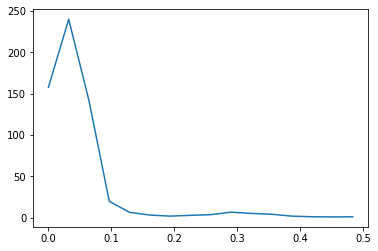

[1.40267638e+03 2.64628298e+03 2.36009550e+03 1.29368277e+03
 7.15828569e+02 4.33062004e+02 5.73379814e+01 1.17859722e+01
 3.16223885e+00 2.97078366e-01 6.88385681e-01 1.26205838e+00
 3.07234307e+00 5.44773147e+00 9.31570725e+00 5.38678570e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
51.4420351403461
(array([1], dtype=int64),)


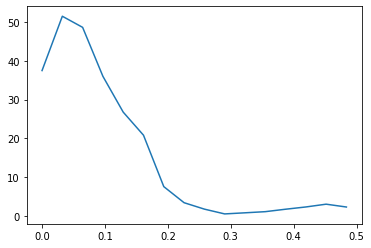

[1.11448680e+02 5.73551852e+02 2.93996709e+02 3.23318338e+02
 1.21191978e+02 7.30322438e+01 9.38073454e+01 1.53046893e+02
 1.65147273e+02 1.42013055e+01 2.29483191e+00 1.44033658e+00
 7.86999270e+00 8.17102555e+00 3.46207661e-01 8.81452668e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
23.94894259989673
(array([1], dtype=int64),)


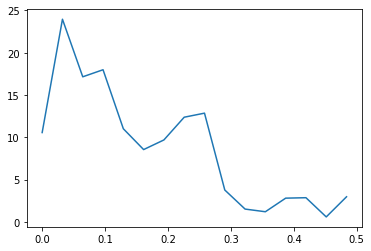

[3.75547302e+02 4.06490180e+03 1.40095440e+03 1.21822944e+03
 1.13361737e+02 1.48632335e+02 7.15833408e+01 1.59282384e+01
 4.51735549e+00 1.27397637e+00 3.51769725e+00 1.56368041e+00
 1.77868521e+00 6.36321490e-02 5.34617762e-01 1.79885160e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
63.75658239843889
(array([1], dtype=int64),)


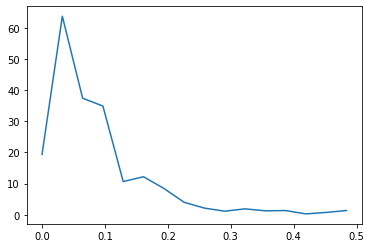

[1.53603498e+04 4.37762503e+04 1.77402587e+04 1.25564678e+03
 2.47391793e+02 1.67049704e+01 1.72726840e+01 2.06090657e+00
 2.51664944e+00 5.51122377e+00 1.01372094e+01 1.21031604e+01
 1.00352655e+01 1.01990951e+01 4.15011126e+00 3.36910703e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
209.22774736537735
(array([1], dtype=int64),)


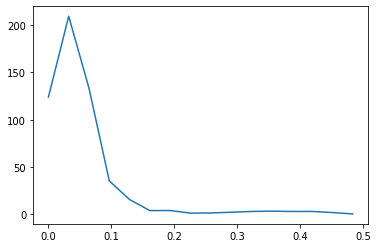

[1.21794557e+04 3.27759611e+04 1.07391411e+04 2.39314375e+02
 2.14300547e+03 5.37308677e+02 5.28093528e+01 6.77349290e+01
 1.29562112e+02 8.03966822e+01 1.49535947e+02 8.52491293e+01
 1.50192523e+01 3.02569219e+01 1.96325220e+01 1.96911341e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
181.04132440960737
(array([1], dtype=int64),)


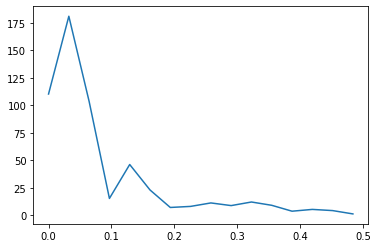

[1.23702150e+04 2.65249439e+04 8.16711308e+03 1.81687293e+02
 2.73975042e+01 3.30022723e+01 2.77491019e+01 3.58273650e+01
 2.41007980e+01 5.83472451e+00 4.31443296e+01 5.53053620e+01
 1.63937253e+01 2.43046557e+00 2.78622770e+00 1.99820338e+01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
162.86480244517685
(array([1], dtype=int64),)


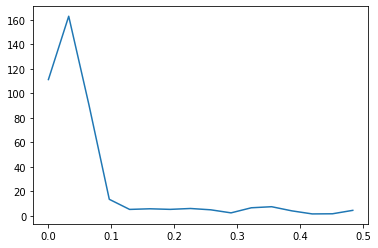

[1.36503816e+04 5.57082076e+04 1.77786258e+04 8.67388152e+03
 8.65296878e+02 1.28171481e+01 4.60095658e+01 3.46556893e+02
 2.39795439e+02 6.81286316e+01 3.36797591e+01 4.23475214e+01
 6.44313365e+01 4.58612943e+01 4.22022079e+01 2.32082219e+01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
236.02586221975187
(array([1], dtype=int64),)


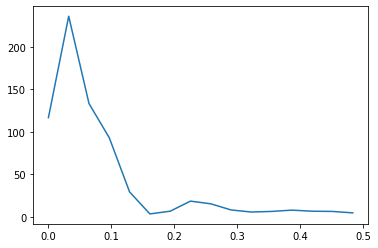

[5.72070470e+03 1.30497739e+04 5.67881379e+03 2.50001619e+02
 6.02531406e+01 1.24942979e+02 3.08117680e+01 8.11448079e+00
 1.38173124e+01 2.02320373e+01 2.25953524e+00 2.70331779e+00
 3.21490843e+00 7.81035299e+00 1.28508480e+00 1.29314540e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
114.23560694067619
(array([1], dtype=int64),)


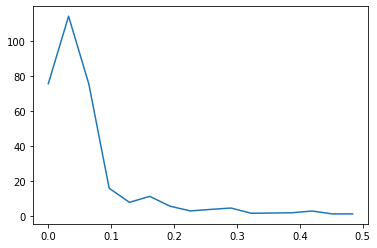

[1.01353470e+04 1.90961523e+04 5.61866078e+03 4.16447201e+02
 2.83131479e+02 3.01620032e+01 1.65866502e+02 1.88136644e+01
 8.74851006e-01 1.05566715e+01 2.09324380e+01 4.75215376e+00
 3.46160485e+00 4.78751655e-01 7.35349195e+00 2.06435714e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
138.18882832577674
(array([1], dtype=int64),)


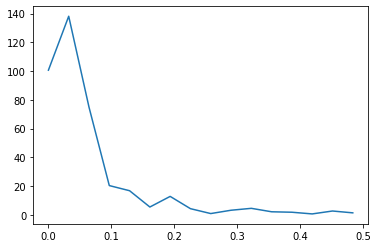

[2.52378946e+02 1.27605555e+04 1.90626631e+03 7.67965674e+02
 4.03918459e+00 1.74081953e+01 2.25688469e+01 1.35472980e+01
 3.22019468e+01 5.86989206e+01 6.98750692e+01 4.28022215e+01
 2.21430400e+01 4.01856802e+00 4.06541710e+00 8.45651468e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
112.96262858424343
(array([1], dtype=int64),)


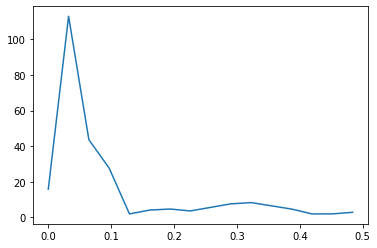

[2.37145074e+02 2.69089977e+04 2.49624065e+03 1.92137928e+01
 7.40838240e+01 1.27936450e+02 2.47739956e+01 4.20538596e+01
 2.20772609e+01 1.29981949e+01 3.71164952e+00 9.40890460e-01
 2.24041545e+00 3.90109041e+00 1.35160562e+00 1.05609588e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
164.03962248986787
(array([1], dtype=int64),)


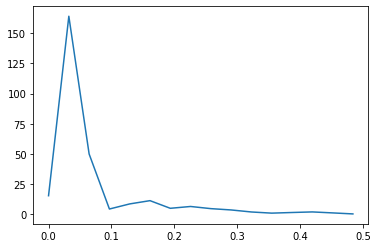

[7.02634525e+03 2.81155295e+04 3.05393837e+03 3.10973882e+03
 6.96941573e+02 2.35493322e+02 1.10541892e+02 2.54471089e+01
 1.21509792e+01 8.41508424e+00 1.73951279e+00 1.43801815e+00
 1.17455030e+00 2.38068278e+00 1.94102052e-01 9.52754972e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
167.67686047477443
(array([1], dtype=int64),)


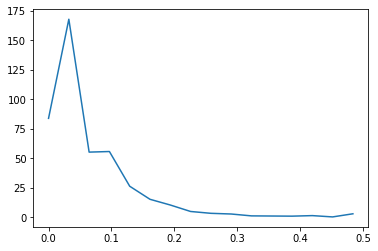

[4.23352523e+03 1.04498464e+04 1.80338396e+03 1.82624917e+02
 3.85966874e+02 2.41243072e+02 6.37597309e+01 6.95019206e+00
 3.79357210e+00 4.00969819e+00 4.63598721e+00 9.82850122e-01
 6.32641647e-03 1.72634925e-01 1.56867646e+00 4.95941027e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
102.22449023042822
(array([1], dtype=int64),)


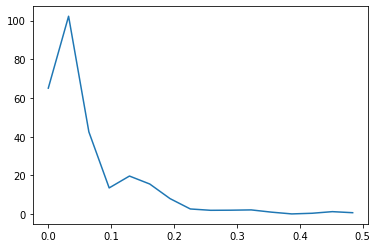

[1.46600957e+03 3.66438842e+03 3.65063429e+03 6.01880473e+02
 1.05262803e+00 7.69332381e+01 1.02156077e+01 1.09224383e+01
 1.53613571e+01 3.45523973e+01 2.87364527e+01 2.61081599e+01
 2.16898650e+01 8.63302107e+00 1.21291611e+01 9.76232580e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
60.53419217624829
(array([1], dtype=int64),)


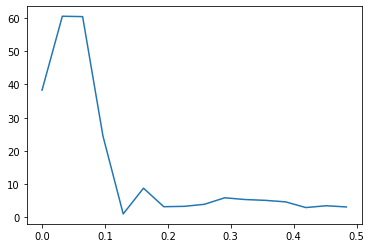

[5.54016606e+03 6.14547909e+03 3.67044861e+02 2.62698572e+03
 4.19551364e+02 2.51722706e+02 1.12375715e+02 3.17497555e+01
 4.82082639e+00 7.15378371e+00 8.51196049e+00 9.72629542e-01
 1.64813787e+00 2.04619411e+00 8.97618728e-02 3.83749245e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
78.39310616432148
(array([1], dtype=int64),)


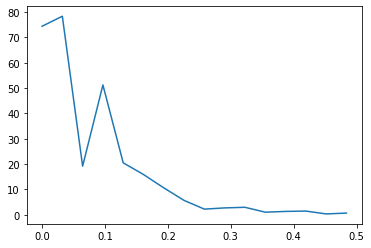

[1.78036619e+02 1.51051730e+03 1.31226657e+03 7.28757765e+02
 2.19708578e+02 7.32543960e+01 4.83174359e+01 2.83847263e+01
 1.02549737e-01 8.12808196e-01 3.26438715e+00 2.94522411e+00
 3.05962930e+00 5.45522250e-01 1.66018640e+00 1.08582947e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
38.86537406068205
(array([1], dtype=int64),)


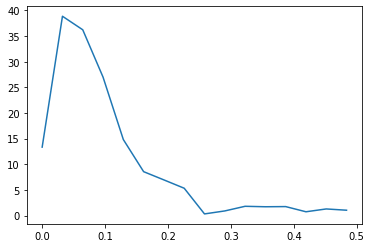

[8.21172800e+02 2.71438802e+04 1.51101664e+03 1.98865898e+02
 3.47984101e-02 4.08955655e+01 1.62439519e+01 1.70946666e+01
 7.43961808e+00 6.87280826e-01 1.11794430e+01 9.99834884e+00
 2.63902807e+00 6.62110023e-01 3.89651696e+00 1.98250263e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
164.7539991805815
(array([1], dtype=int64),)


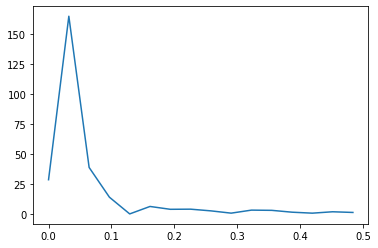

[9.99774640e+03 1.73564278e+04 2.17689461e+03 5.24845772e+02
 1.93092080e+02 1.85980656e+02 1.30476347e+02 5.36633162e+01
 1.46142626e+01 2.08822413e+01 2.81185183e+01 2.19112396e+01
 1.72931896e+01 1.99992712e+01 1.55595578e+01 4.04357168e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
131.743796072664
(array([1], dtype=int64),)


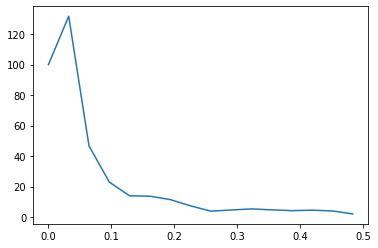

[2.19061251e+02 1.96385360e+04 6.67363001e+02 2.39123382e+03
 8.17682052e+02 2.01200028e+01 4.13981351e+01 2.17302575e+01
 3.44841690e+01 1.80266802e+01 3.85040418e+01 4.00544861e+01
 1.24708862e+01 7.80355466e+00 8.63390632e+00 5.69777401e-03]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
140.13756084399452
(array([1], dtype=int64),)


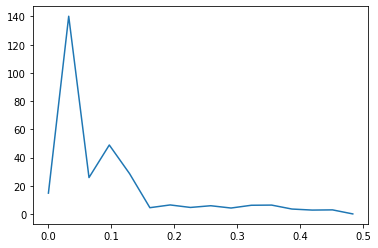

[7.43570280e+03 1.82458990e+04 9.19132750e+03 6.93633891e+02
 9.15854200e+01 6.61826287e+01 1.82681731e+01 4.61041350e-01
 8.06216741e+00 5.41089931e+00 9.88313895e-01 4.67750650e+00
 4.36935863e+00 5.71256376e+00 5.43760123e+00 4.65545539e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
135.07738135436932
(array([1], dtype=int64),)


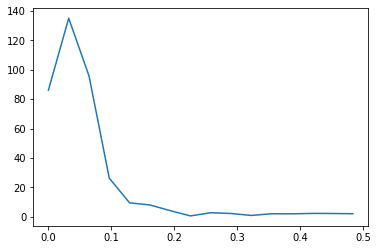

[2.11631273e+04 4.28692428e+04 1.10638187e+04 6.61783017e+02
 1.04094169e+03 5.60534979e+02 4.73378325e+01 6.28796285e+00
 4.41615693e+00 2.72394150e+01 5.55660398e+01 1.35025729e+01
 2.59366954e+01 4.99141328e+01 3.14226800e+01 7.91602433e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
207.04888980895413
(array([1], dtype=int64),)


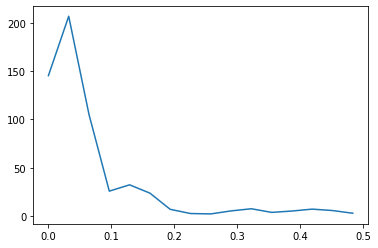

[2.57322873e+04 4.55875123e+04 6.38406406e+03 1.87090733e+03
 1.21562739e+03 1.52235490e+02 1.57542128e+02 1.70649248e+01
 1.88678837e+01 9.16115026e+01 8.46327682e+01 2.17065077e+02
 1.00261924e+02 1.63031645e+01 1.22273904e+01 9.77263513e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
213.51232349253817
(array([1], dtype=int64),)


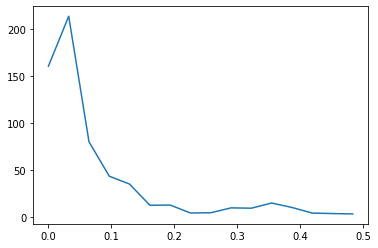

[3.20293451e+02 1.76720363e+04 4.37441617e+03 1.27261152e+03
 7.92203605e+01 6.79330219e+01 8.76405008e+01 1.36418064e+01
 8.22079137e-02 1.64982242e+00 1.10038260e+00 2.02091830e+00
 1.40884187e+00 1.40604662e+00 7.36010593e-01 3.17638900e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
132.93621155208564
(array([1], dtype=int64),)


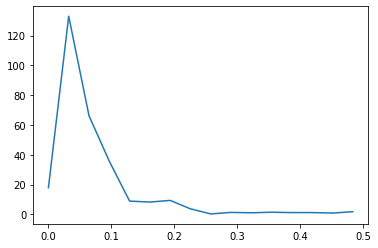

[2.95241617e+03 6.74441343e+04 8.34422110e+03 7.87162005e+02
 7.00923709e+02 3.67268247e+02 1.00370382e+02 1.43111118e+01
 1.91951898e+01 2.12266487e+01 3.98659341e+01 2.09426805e+01
 6.58100803e+00 4.82577966e-01 3.25708930e-01 1.63915454e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
259.7000853340259
(array([1], dtype=int64),)


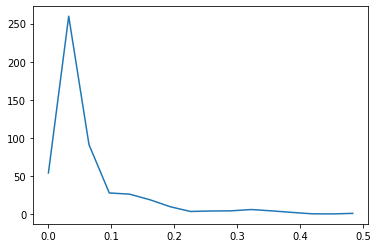

[1.77952059e+03 3.18436298e+04 9.21761687e+03 9.21631916e+02
 8.48750423e+01 4.40190021e+00 1.37669533e+00 4.53893593e+00
 5.73599519e+00 1.84537014e+01 1.74869314e+00 1.02295417e+00
 2.28940687e+00 3.22020651e-01 1.30034564e-01 3.80402164e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
178.44783484566426
(array([1], dtype=int64),)


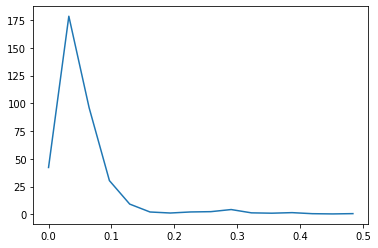

[6.71299807e-02 3.89112333e+03 1.48195293e+03 1.31634325e+03
 2.14310495e+02 3.33441297e+02 5.70279446e+01 1.32300811e+00
 1.05272432e-01 1.05209311e+00 3.78647261e+00 1.31821319e+00
 9.51236783e-01 7.08311505e-01 1.61996322e+00 1.93516850e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
62.37886926742674
(array([1], dtype=int64),)


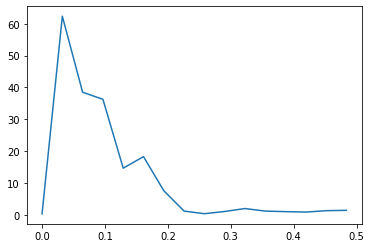

[2.18557404e+03 4.65753940e+03 4.24563128e+02 3.62631242e+02
 1.48263079e+02 1.06585098e+02 4.18354889e+01 6.81107664e+00
 1.51585732e-01 1.51950306e+00 2.11886864e-01 4.98234304e+00
 2.54771976e+00 8.58782311e-02 1.02782251e+00 7.01150186e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
68.2461676622061
(array([1], dtype=int64),)


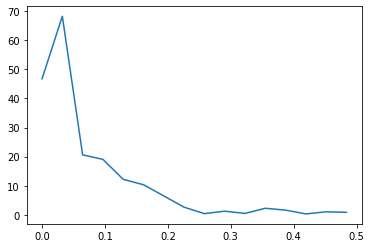

[1.25664316e+03 3.60054030e+04 2.41826242e+03 8.76891438e+01
 5.78602026e+01 9.73530369e+01 4.76854927e-01 2.93811107e+01
 2.50171462e+01 9.77171941e-02 6.11864594e+00 1.58262476e+01
 1.14862664e+01 2.81017388e+00 4.07439024e-01 3.13117183e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
189.75089710749833
(array([1], dtype=int64),)


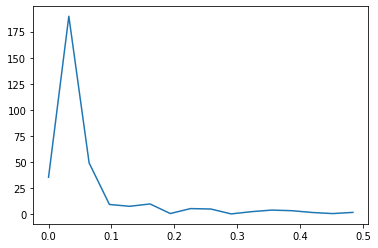

[3.77805688e+03 1.22349061e+04 3.10572778e+03 3.82114396e+01
 1.74649772e+01 9.61292963e+00 4.62734888e+01 8.60414966e+00
 9.49072109e+00 9.15622854e+00 1.04474504e+00 1.30712990e+00
 1.08362133e+00 6.96222800e-01 1.02616943e+00 9.99074663e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
110.61150974003387
(array([1], dtype=int64),)


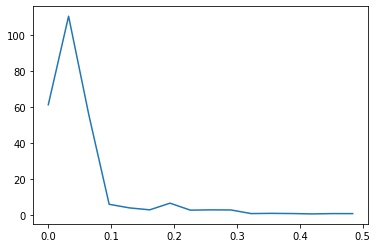

[1.14230132e+02 5.09580176e+02 6.06228363e+02 2.32821632e+02
 1.72307200e+02 6.59058951e+01 2.32669343e+00 4.34570189e+00
 2.58592058e+00 9.78258554e-01 3.37652192e-01 5.93478971e-02
 6.46011152e-02 6.08040355e-02 1.16030737e-02 4.93315181e-02]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
24.621705110266372
(array([2], dtype=int64),)


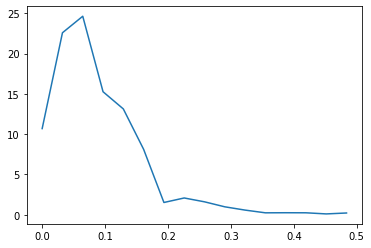

[1.49571087e+02 1.53445962e+04 5.75177113e+03 1.42587881e+03
 2.15163224e+01 9.75034672e+01 3.36838818e+01 1.17712937e+01
 1.76965823e+01 5.15766212e-01 7.09061350e-01 1.62192929e+00
 1.24593316e+00 2.45016541e-01 3.97671206e-01 1.50965683e-01]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
123.87330713698526
(array([1], dtype=int64),)


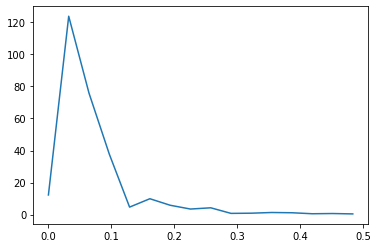

[4.67542316e+02 1.43051324e+04 2.62878347e+03 5.39970333e+03
 1.48899456e+03 4.87120508e+02 9.33863738e+01 1.16988218e+02
 2.95817312e+01 1.90745344e+02 2.89441115e+01 1.34689410e+01
 1.80432426e+00 4.07959741e+00 1.98683034e+00 2.83825546e+00]
[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097]
119.60406534708416
(array([1], dtype=int64),)


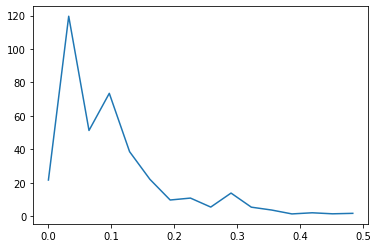

In [38]:
calWelch()

**********************************************
Counter -  0
[108.         108.         103.         101.         100.
 104.         117.         123.         137.         142.
 146.         154.         165.         164.         155.
 147.         145.         149.         157.         175.
 185.         190.         195.38002923 202.0765504  209.
 215.         216.         214.         211.         212.
 213.        ]
__________________________________________________
Window Size -  2
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  4
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  6
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  8
Disp - 20.0
Velocity -  2.0
__________________________________________________
Window Size -  10
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  12
Disp - 19.0
Velocity -  1.9
__

C:\Users\abhik\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


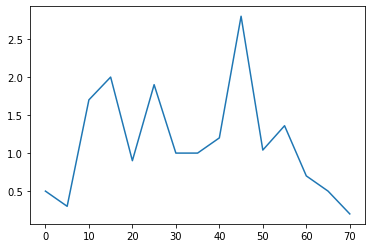

**********************************************
Counter -  1
[ 63.  63.  58.  52.  56.  63.  79. 105. 123. 143. 167. 177. 185. 195.
 193. 190. 188. 181. 166. 154. 144. 133. 118. 107. 100.  89.  79.  74.
  65.  55.  57.]
__________________________________________________
Window Size -  2
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  4
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  6
Disp - 23.0
Velocity -  2.3
__________________________________________________
Window Size -  8
Disp - 44.0
Velocity -  4.4
__________________________________________________
Window Size -  10
Disp - 44.0
Velocity -  4.4
__________________________________________________
Window Size -  12
Disp - 18.0
Velocity -  1.8
__________________________________________________
Window Size -  14
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  16
Disp - 5.0
Velocity -  0.5
_____________

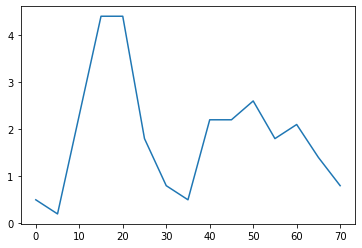

**********************************************
Counter -  2
[197. 197. 207. 209. 215. 234. 236. 245. 248. 251. 258. 263. 271. 268.
 259. 242. 232. 230. 237. 242. 245. 244. 242. 239. 239. 241. 243. 243.
 239. 234. 229.]
__________________________________________________
Window Size -  2
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  4
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  6
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  8
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  10
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  12
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  14
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  16
Disp - 27.0
Velocity -  2.7
__________

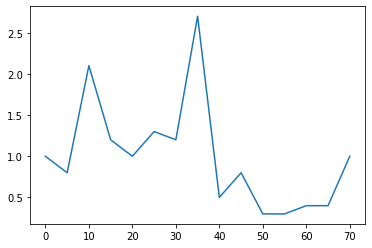

**********************************************
Counter -  3
[134. 134. 117. 109. 102.  91.  89.  95. 110. 105. 100. 102. 112. 113.
 104. 102. 108. 111. 114. 115. 123. 118. 107. 102.  98.  88.  85.  84.
  89.  88.  86.]
__________________________________________________
Window Size -  2
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  4
Disp - 15.0
Velocity -  1.5
__________________________________________________
Window Size -  6
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  8
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  10
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  12
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  14
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  16
Disp - 4.0
Velocity -  0.4
___________

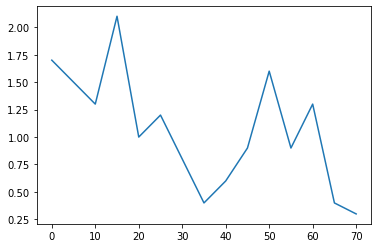

**********************************************
Counter -  4
[ 99.  99.  95.  93.  89.  85.  84.  85.  88.  97. 111. 117. 121. 124.
 129. 135. 137. 130. 123. 118. 119. 124. 134. 146. 154. 161. 169. 172.
 175. 175. 175.]
__________________________________________________
Window Size -  2
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  4
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  6
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  8
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  10
Disp - 23.0
Velocity -  2.3
__________________________________________________
Window Size -  12
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  14
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  16
Disp - 8.0
Velocity -  0.8
_______________

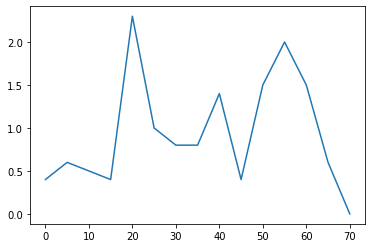

**********************************************
Counter -  5
[ 60.  60.  63.  67.  76.  89.  97. 106. 116. 127. 140. 154. 167. 182.
 201. 206. 210. 206. 192. 182. 169. 159. 148. 140. 136. 131. 127. 121.
 114. 106. 101.]
__________________________________________________
Window Size -  2
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  4
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  6
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  8
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  10
Disp - 24.0
Velocity -  2.4
__________________________________________________
Window Size -  12
Disp - 27.0
Velocity -  2.7
__________________________________________________
Window Size -  14
Disp - 34.0
Velocity -  3.4
__________________________________________________
Window Size -  16
Disp - 9.0
Velocity -  0.9
___________

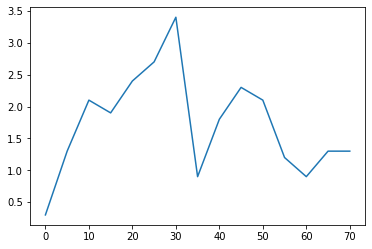

**********************************************
Counter -  6
[144.         157.         182.         200.         215.
 233.         231.         219.         223.         252.
 257.         276.         302.         296.         292.
 293.         301.         309.         317.         313.
 306.         292.         260.         235.50555696 224.58365752
 227.23430167 240.35883295 250.19251442 254.02447584 252.
 244.        ]
__________________________________________________
Window Size -  2
Disp - 38.0
Velocity -  3.8
__________________________________________________
Window Size -  4
Disp - 33.0
Velocity -  3.3
__________________________________________________
Window Size -  6
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  8
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  10
Disp - 34.0
Velocity -  3.4
__________________________________________________
Window Size -  12
Disp - 45.0
Velocity

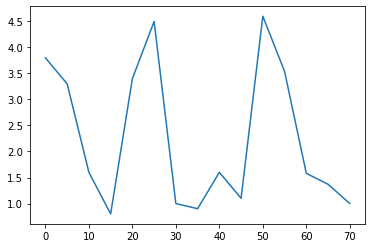

**********************************************
Counter -  7
[131. 131. 134. 144. 154. 162. 170. 181. 182. 191. 200. 207. 216. 234.
 232. 233. 235. 232. 229. 222. 205. 201. 190. 176. 167. 159. 154. 146.
 142. 139. 139.]
__________________________________________________
Window Size -  2
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  4
Disp - 20.0
Velocity -  2.0
__________________________________________________
Window Size -  6
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  8
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  10
Disp - 18.0
Velocity -  1.8
__________________________________________________
Window Size -  12
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  14
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  16
Disp - 3.0
Velocity -  0.3
___________

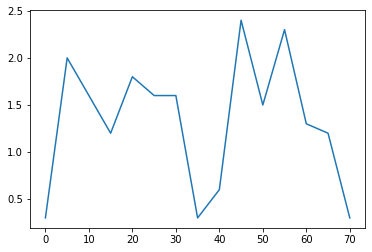

**********************************************
Counter -  8
[ 58.  58.  57.  64.  74.  78.  90. 102. 151. 188. 227. 235. 259. 277.
 260. 246. 237. 234. 234. 233. 239. 250. 249. 245. 239. 240. 244. 244.
 241. 235. 224.]
__________________________________________________
Window Size -  2
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  4
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  6
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  8
Disp - 61.0
Velocity -  6.1
__________________________________________________
Window Size -  10
Disp - 76.0
Velocity -  7.6
__________________________________________________
Window Size -  12
Disp - 32.0
Velocity -  3.2
__________________________________________________
Window Size -  14
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  16
Disp - 23.0
Velocity -  2.3
___________

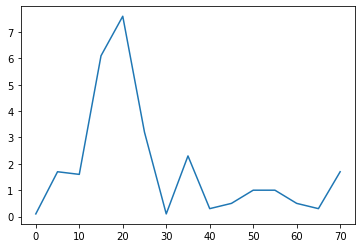

**********************************************
Counter -  9
[ 46.  58.  85. 101. 110. 123. 135. 136. 143. 153. 168. 179. 184. 187.
 183. 179. 178. 176. 169. 158. 156. 148. 142. 142. 145. 152. 156. 155.
 157. 156. 151.]
__________________________________________________
Window Size -  2
Disp - 39.0
Velocity -  3.9
__________________________________________________
Window Size -  4
Disp - 25.0
Velocity -  2.5
__________________________________________________
Window Size -  6
Disp - 25.0
Velocity -  2.5
__________________________________________________
Window Size -  8
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  10
Disp - 25.0
Velocity -  2.5
__________________________________________________
Window Size -  12
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  14
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  16
Disp - 5.0
Velocity -  0.5
____________

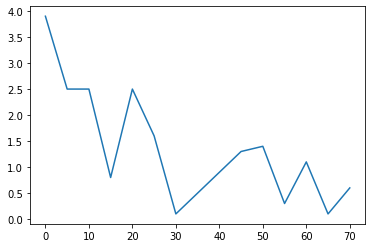

**********************************************
Counter -  10
[ 84. 109. 126. 153. 174. 189. 209. 211. 215. 221. 233. 240. 245. 244.
 236. 233. 229. 217. 204. 199. 195. 200. 201. 194. 183. 174. 173. 177.
 181. 177. 175.]
__________________________________________________
Window Size -  2
Disp - 42.0
Velocity -  4.2
__________________________________________________
Window Size -  4
Disp - 48.0
Velocity -  4.8
__________________________________________________
Window Size -  6
Disp - 35.0
Velocity -  3.5
__________________________________________________
Window Size -  8
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  10
Disp - 18.0
Velocity -  1.8
__________________________________________________
Window Size -  12
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  14
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  16
Disp - 7.0
Velocity -  0.7
___________

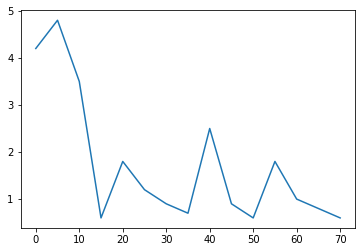

**********************************************
Counter -  11
[111. 111. 106. 102. 105. 108. 114. 129. 145. 150. 164. 183. 183. 184.
 196. 192. 193. 192. 191. 193. 199. 203. 207. 206. 209. 210. 216. 230.
 228. 234. 256.]
__________________________________________________
Window Size -  2
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  4
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  6
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  8
Disp - 31.0
Velocity -  3.1
__________________________________________________
Window Size -  10
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  12
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  14
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  16
Disp - 3.0
Velocity -  0.3
____________

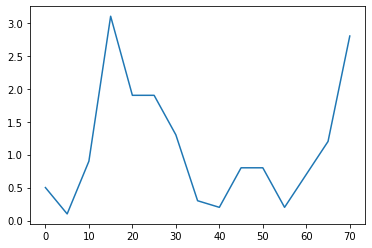

**********************************************
Counter -  12
[ 79.  80.  83.  85.  90. 100. 104. 107. 111. 118. 127. 134. 140. 148.
 157. 159. 167. 181. 193. 198. 197. 201. 204. 211. 221. 223. 227. 232.
 242. 254. 260.]
__________________________________________________
Window Size -  2
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  4
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  6
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  8
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  10
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  12
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  14
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  16
Disp - 10.0
Velocity -  1.0
___________

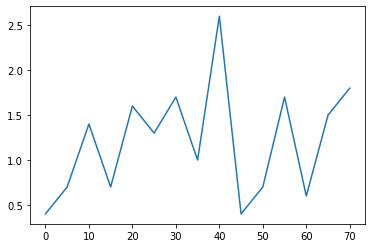

**********************************************
Counter -  13
[ 96.  96.  98.  97.  93.  96. 103. 115. 131. 165. 191. 203. 202. 199.
 197. 199. 201. 206. 208. 214. 217. 220. 218. 214. 203. 192. 188. 182.
 173. 167. 160.]
__________________________________________________
Window Size -  2
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  4
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  6
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  8
Disp - 28.0
Velocity -  2.8
__________________________________________________
Window Size -  10
Disp - 60.0
Velocity -  6.0
__________________________________________________
Window Size -  12
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  14
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  16
Disp - 4.0
Velocity -  0.4
____________

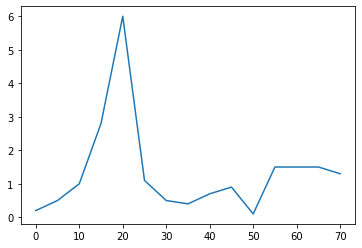

**********************************************
Counter -  14
[114. 114. 114. 113. 113. 127. 134. 139. 147. 157. 164. 170. 172. 168.
 169. 176. 186. 191. 190. 183. 176. 170. 167. 167. 166. 160. 151. 145.
 137. 131. 125.]
__________________________________________________
Window Size -  2
Disp - 0.0
Velocity -  0.0
__________________________________________________
Window Size -  4
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  6
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  8
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  10
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  12
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  14
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  16
Disp - 17.0
Velocity -  1.7
____________

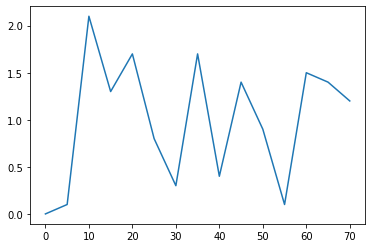

**********************************************
Counter -  15
[127. 131. 140. 156. 184. 196. 212. 222. 228. 238. 254. 250. 259. 259.
 250. 245. 242. 240. 235. 232. 233. 236. 242. 253. 261. 267. 277. 275.
 276. 276. 283.]
__________________________________________________
Window Size -  2
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  4
Disp - 44.0
Velocity -  4.4
__________________________________________________
Window Size -  6
Disp - 28.0
Velocity -  2.8
__________________________________________________
Window Size -  8
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  10
Disp - 26.0
Velocity -  2.6
__________________________________________________
Window Size -  12
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  14
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  16
Disp - 8.0
Velocity -  0.8
___________

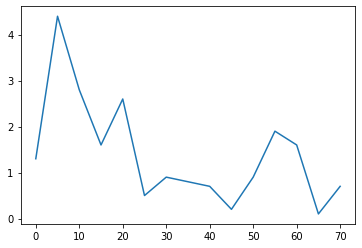

**********************************************
Counter -  16
[ 98.  98. 105. 112. 122. 133. 144. 153. 158. 163. 165. 161. 159. 156.
 154. 153. 151. 150. 158. 177. 189. 186. 175. 154. 137. 125. 116. 108.
 103.  96.  94.]
__________________________________________________
Window Size -  2
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  4
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  6
Disp - 22.0
Velocity -  2.2
__________________________________________________
Window Size -  8
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  10
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  12
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  14
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  16
Disp - 3.0
Velocity -  0.3
_____________

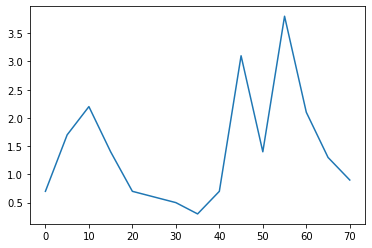

**********************************************
Counter -  17
[63. 63. 68. 70. 81. 80. 76. 77. 86. 96. 98. 92. 83. 74. 69. 67. 62. 64.
 66. 68. 69. 68. 67. 69. 69. 65. 61. 60. 61. 61. 61.]
__________________________________________________
Window Size -  2
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  4
Disp - 13.0
Velocity -  1.3
__________________________________________________
Window Size -  6
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  8
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  10
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  12
Disp - 15.0
Velocity -  1.5
__________________________________________________
Window Size -  14
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  16
Disp - 7.0
Velocity -  0.7
___________________________________________

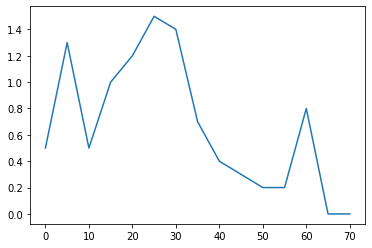

**********************************************
Counter -  18
[118. 118. 117. 116. 117. 120. 125. 132. 139. 144. 147. 154. 166. 171.
 176. 181. 186. 196. 205. 211. 220. 231. 233. 244. 250. 258. 260. 266.
 269. 273. 276.]
__________________________________________________
Window Size -  2
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  4
Disp - 0.0
Velocity -  0.0
__________________________________________________
Window Size -  6
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  8
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  10
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  12
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  14
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  16
Disp - 10.0
Velocity -  1.0
____________

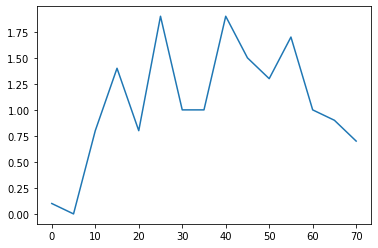

**********************************************
Counter -  19
[148.         148.         137.         124.         117.
 109.         103.          99.          99.          67.
  56.          55.          55.          60.          58.
  56.          54.          56.          56.          57.
  59.70478702  64.28942138  70.7004417   78.6771479   88.68875773
  99.39707751 109.60670541 119.0468797  128.27290442 137.
 145.        ]
__________________________________________________
Window Size -  2
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  4
Disp - 20.0
Velocity -  2.0
__________________________________________________
Window Size -  6
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  8
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  10
Disp - 43.0
Velocity -  4.3
__________________________________________________
Window Size -  12
Disp - 1.0
Velocity

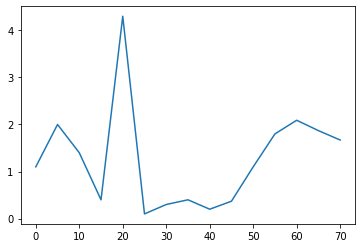

**********************************************
Counter -  20
[ 40.  40.  40.  47.  51.  59.  79.  77.  81.  94.  99. 109. 121. 127.
 142. 150. 143. 138. 134. 135. 138. 155. 175. 192. 211. 226. 239. 208.
 213. 215. 213.]
__________________________________________________
Window Size -  2
Disp - 0.0
Velocity -  0.0
__________________________________________________
Window Size -  4
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  6
Disp - 28.0
Velocity -  2.8
__________________________________________________
Window Size -  8
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  10
Disp - 18.0
Velocity -  1.8
__________________________________________________
Window Size -  12
Disp - 22.0
Velocity -  2.2
__________________________________________________
Window Size -  14
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  16
Disp - 1.0
Velocity -  0.1
___________

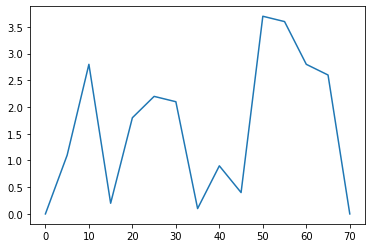

**********************************************
Counter -  21
[139. 139. 147. 156. 164. 173. 183. 197. 209. 216. 225. 235. 244. 246.
 250. 241. 231. 219. 210. 205. 197. 191. 188. 185. 185. 187. 187. 185.
 183. 180. 180.]
__________________________________________________
Window Size -  2
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  4
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  6
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  8
Disp - 26.0
Velocity -  2.6
__________________________________________________
Window Size -  10
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  12
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  14
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  16
Disp - 19.0
Velocity -  1.9
__________

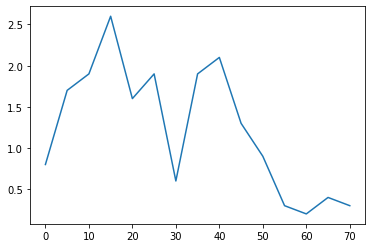

**********************************************
Counter -  22
[132. 132. 139. 143. 151. 172. 197. 206. 215. 220. 222. 218. 239. 248.
 262. 274. 267. 257. 241. 236. 228. 222. 210. 183. 166. 154. 145. 138.
 135. 141. 148.]
__________________________________________________
Window Size -  2
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  4
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  6
Disp - 46.0
Velocity -  4.6
__________________________________________________
Window Size -  8
Disp - 18.0
Velocity -  1.8
__________________________________________________
Window Size -  10
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  12
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  14
Disp - 23.0
Velocity -  2.3
__________________________________________________
Window Size -  16
Disp - 5.0
Velocity -  0.5
___________

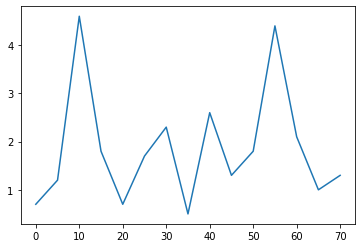

**********************************************
Counter -  23
[120. 120. 139. 160. 179. 210. 257. 259. 246. 253. 244. 241. 261. 257.
 270. 281. 276. 268. 255. 243. 235. 222. 211. 195. 156. 139. 144. 143.
 144. 145. 149.]
__________________________________________________
Window Size -  2
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  4
Disp - 40.0
Velocity -  4.0
__________________________________________________
Window Size -  6
Disp - 78.0
Velocity -  7.8
__________________________________________________
Window Size -  8
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  10
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  12
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  14
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  16
Disp - 6.0
Velocity -  0.6
___________

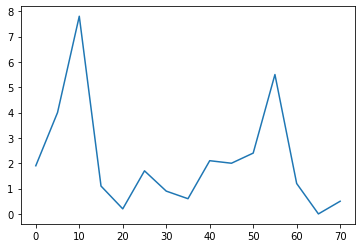

**********************************************
Counter -  24
[107. 107.  99.  96.  96.  95. 102. 108. 113. 129. 143. 158. 168. 176.
 183. 191. 194. 191. 183. 179. 181. 188. 194. 200. 204. 209. 214. 217.
 217. 212. 206.]
__________________________________________________
Window Size -  2
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  4
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  6
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  8
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  10
Disp - 30.0
Velocity -  3.0
__________________________________________________
Window Size -  12
Disp - 25.0
Velocity -  2.5
__________________________________________________
Window Size -  14
Disp - 15.0
Velocity -  1.5
__________________________________________________
Window Size -  16
Disp - 11.0
Velocity -  1.1
___________

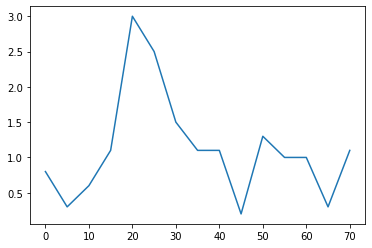

**********************************************
Counter -  25
[130. 130. 130. 132. 134. 135. 135. 131. 128. 127. 131. 146. 174. 188.
 193. 202. 208. 217. 237. 252. 266. 280. 290. 299. 305. 305. 300. 300.
 312. 338. 339.]
__________________________________________________
Window Size -  2
Disp - 0.0
Velocity -  0.0
__________________________________________________
Window Size -  4
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  6
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  8
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  10
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  12
Disp - 43.0
Velocity -  4.3
__________________________________________________
Window Size -  14
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  16
Disp - 15.0
Velocity -  1.5
_____________

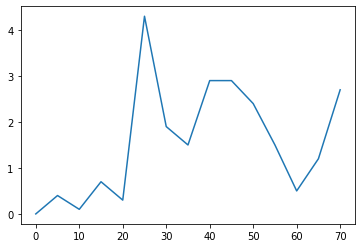

**********************************************
Counter -  26
[212. 212. 228. 235. 244. 254. 261. 270. 278. 281. 275. 266. 256. 240.
 225. 214. 203. 195. 190. 187. 181. 175. 173. 169. 158. 157. 162. 169.
 175. 178. 177.]
__________________________________________________
Window Size -  2
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  4
Disp - 16.0
Velocity -  1.6
__________________________________________________
Window Size -  6
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  8
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  10
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  12
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  14
Disp - 31.0
Velocity -  3.1
__________________________________________________
Window Size -  16
Disp - 22.0
Velocity -  2.2
_________

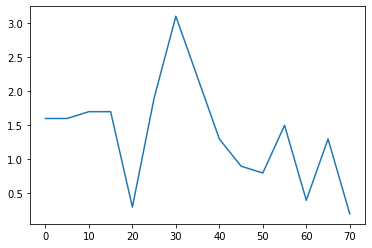

**********************************************
Counter -  27
[ 90.  84.  80.  73.  70.  71.  69.  67.  66.  69.  77.  94. 107. 114.
 112. 108. 103. 104. 107. 106. 105. 104. 106. 115. 125. 132. 138. 132.
 124. 112.  90.]
__________________________________________________
Window Size -  2
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  4
Disp - 10.0
Velocity -  1.0
__________________________________________________
Window Size -  6
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  8
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  10
Disp - 11.0
Velocity -  1.1
__________________________________________________
Window Size -  12
Disp - 30.0
Velocity -  3.0
__________________________________________________
Window Size -  14
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  16
Disp - 9.0
Velocity -  0.9
____________

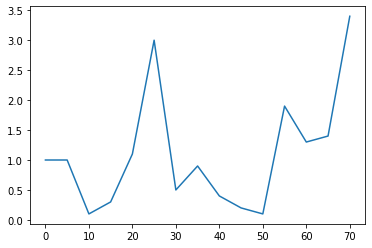

**********************************************
Counter -  28
[141. 141. 133. 128. 128. 129. 124. 107.  96.  89.  90.  95.  96.  93.
  90.  86.  85.  84.  82.  84.  85.  88.  93.  98. 102. 110. 114. 113.
 111. 111. 108.]
__________________________________________________
Window Size -  2
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  4
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  6
Disp - 4.0
Velocity -  0.4
__________________________________________________
Window Size -  8
Disp - 28.0
Velocity -  2.8
__________________________________________________
Window Size -  10
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  12
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  14
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  16
Disp - 5.0
Velocity -  0.5
_______________

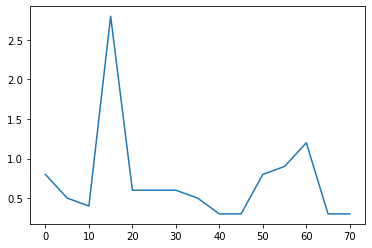

**********************************************
Counter -  29
[ 95.  95. 100. 102. 106. 117. 140. 157. 169. 172. 183. 196. 204. 214.
 224. 230. 239. 240. 246. 256. 259. 261. 264. 267. 272. 278. 281. 281.
 281. 276. 268.]
__________________________________________________
Window Size -  2
Disp - 5.0
Velocity -  0.5
__________________________________________________
Window Size -  4
Disp - 6.0
Velocity -  0.6
__________________________________________________
Window Size -  6
Disp - 34.0
Velocity -  3.4
__________________________________________________
Window Size -  8
Disp - 29.0
Velocity -  2.9
__________________________________________________
Window Size -  10
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  12
Disp - 21.0
Velocity -  2.1
__________________________________________________
Window Size -  14
Disp - 20.0
Velocity -  2.0
__________________________________________________
Window Size -  16
Disp - 15.0
Velocity -  1.5
__________

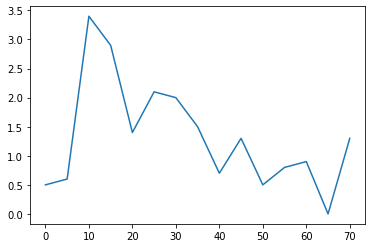

**********************************************
Counter -  30
[233. 233. 235. 234. 234. 239. 248. 255. 257. 258. 260. 261. 263. 264.
 261. 254. 250. 246. 240. 227. 219. 214. 208. 206. 203. 197. 192. 189.
 184. 180. 179.]
__________________________________________________
Window Size -  2
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  4
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  6
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  8
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  10
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  12
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  14
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  16
Disp - 11.0
Velocity -  1.1
______________

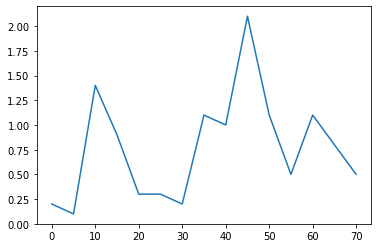

**********************************************
Counter -  31
[208. 208. 209. 207. 207. 208. 208. 208. 208. 210. 215. 222. 227. 228.
 224. 219. 216. 214. 213. 214. 215. 213. 209. 208. 209. 211. 213. 214.
 215. 215. 215.]
__________________________________________________
Window Size -  2
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  4
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  6
Disp - 1.0
Velocity -  0.1
__________________________________________________
Window Size -  8
Disp - 0.0
Velocity -  0.0
__________________________________________________
Window Size -  10
Disp - 7.0
Velocity -  0.7
__________________________________________________
Window Size -  12
Disp - 12.0
Velocity -  1.2
__________________________________________________
Window Size -  14
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  16
Disp - 8.0
Velocity -  0.8
_______________

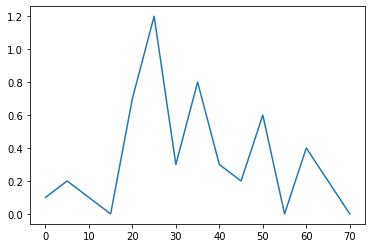

**********************************************
Counter -  32
[111. 114. 108. 105.  99.  96.  91.  87.  88.  95. 112. 131. 143. 152.
 160. 166. 170. 170. 169. 167. 162. 161. 166. 175. 177. 178. 183. 197.
 209. 219. 225.]
__________________________________________________
Window Size -  2
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  4
Disp - 9.0
Velocity -  0.9
__________________________________________________
Window Size -  6
Disp - 8.0
Velocity -  0.8
__________________________________________________
Window Size -  8
Disp - 3.0
Velocity -  0.3
__________________________________________________
Window Size -  10
Disp - 24.0
Velocity -  2.4
__________________________________________________
Window Size -  12
Disp - 31.0
Velocity -  3.1
__________________________________________________
Window Size -  14
Disp - 17.0
Velocity -  1.7
__________________________________________________
Window Size -  16
Disp - 10.0
Velocity -  1.0
____________

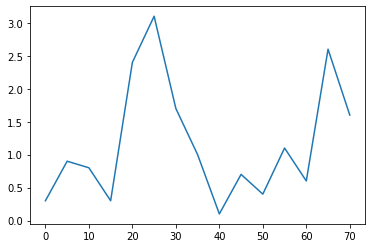

**********************************************
Counter -  33
[287. 309. 325. 341. 355. 362. 328. 312. 309. 299. 289. 293. 303. 305.
 305. 310. 304. 283. 262. 240. 225. 234. 257. 257. 251. 247. 241. 238.
 234. 228. 212.]
__________________________________________________
Window Size -  2
Disp - 38.0
Velocity -  3.8
__________________________________________________
Window Size -  4
Disp - 30.0
Velocity -  3.0
__________________________________________________
Window Size -  6
Disp - 27.0
Velocity -  2.7
__________________________________________________
Window Size -  8
Disp - 19.0
Velocity -  1.9
__________________________________________________
Window Size -  10
Disp - 20.0
Velocity -  2.0
__________________________________________________
Window Size -  12
Disp - 14.0
Velocity -  1.4
__________________________________________________
Window Size -  14
Disp - 2.0
Velocity -  0.2
__________________________________________________
Window Size -  16
Disp - 1.0
Velocity -  0.1
__________

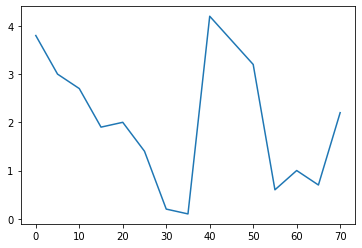

In [39]:
calCgmVelocity()

In [42]:

#Read data from excels
for i in range(5):
    df_date_num_lunch_pat = pd.read_csv('DataFolder/CGMDatenumLunchPat'+str(i+1)+'.csv')
    df_series_lunch_pat = pd.read_csv('DataFolder/CGMSeriesLunchPat'+str(i+1)+'.csv')
    
    #print ('DataFolder/CGMDatenumLunchPat'+str(i)+'.csv')

DataFolder/CGMDatenumLunchPat0.csv
DataFolder/CGMDatenumLunchPat1.csv
DataFolder/CGMDatenumLunchPat2.csv
DataFolder/CGMDatenumLunchPat3.csv
DataFolder/CGMDatenumLunchPat4.csv
